In [2]:
import pandas as pd

PATH = 'https://raw.githubusercontent.com/adamerose/datasets/master/titanic.csv'
df   = pd.read_csv(PATH)

In [3]:
# Identificar e mostrar valores nulos 
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
(df.isna().sum() / df.shape[0] * 100).to_frame('missing_%')

missing_%
survived      0.000000
pclass        0.000000
sex           0.000000
age          19.865320
sibsp         0.000000
parch         0.000000
fare          0.000000
embarked      0.224467
class         0.000000
who           0.000000
adult_male    0.000000
deck         77.216611
embark_town   0.224467
alive         0.000000
alone         0.000000

In [5]:
# Identificar e mostrar os valores nulos
df_missing = (
  df.isna().sum()
  .to_frame('missing_count')
  .join((df.isna().sum() / df.shape[0]).to_frame('missing_%'))
  .sort_values('missing_count', ascending=False)
)

df_missing.style.format('{:.2%}', subset=['missing_%'])

In [6]:
df_missing = (
  df.isna().sum()
    .to_frame('missing_count')
    .assign(missing = lambda x: x.div(len(df)))
    .sort_values('missing_count', ascending=False)
)

df_missing.style.format('{:.2%}', subset=['missing'])


In [7]:
import sidetable

df.stb.missing()

missing  total    percent
deck             688    891  77.216611
age              177    891  19.865320
embarked           2    891   0.224467
embark_town        2    891   0.224467
survived           0    891   0.000000
pclass             0    891   0.000000
sex                0    891   0.000000
sibsp              0    891   0.000000
parch              0    891   0.000000
fare               0    891   0.000000
class              0    891   0.000000
who                0    891   0.000000
adult_male         0    891   0.000000
alive              0    891   0.000000
alone              0    891   0.000000

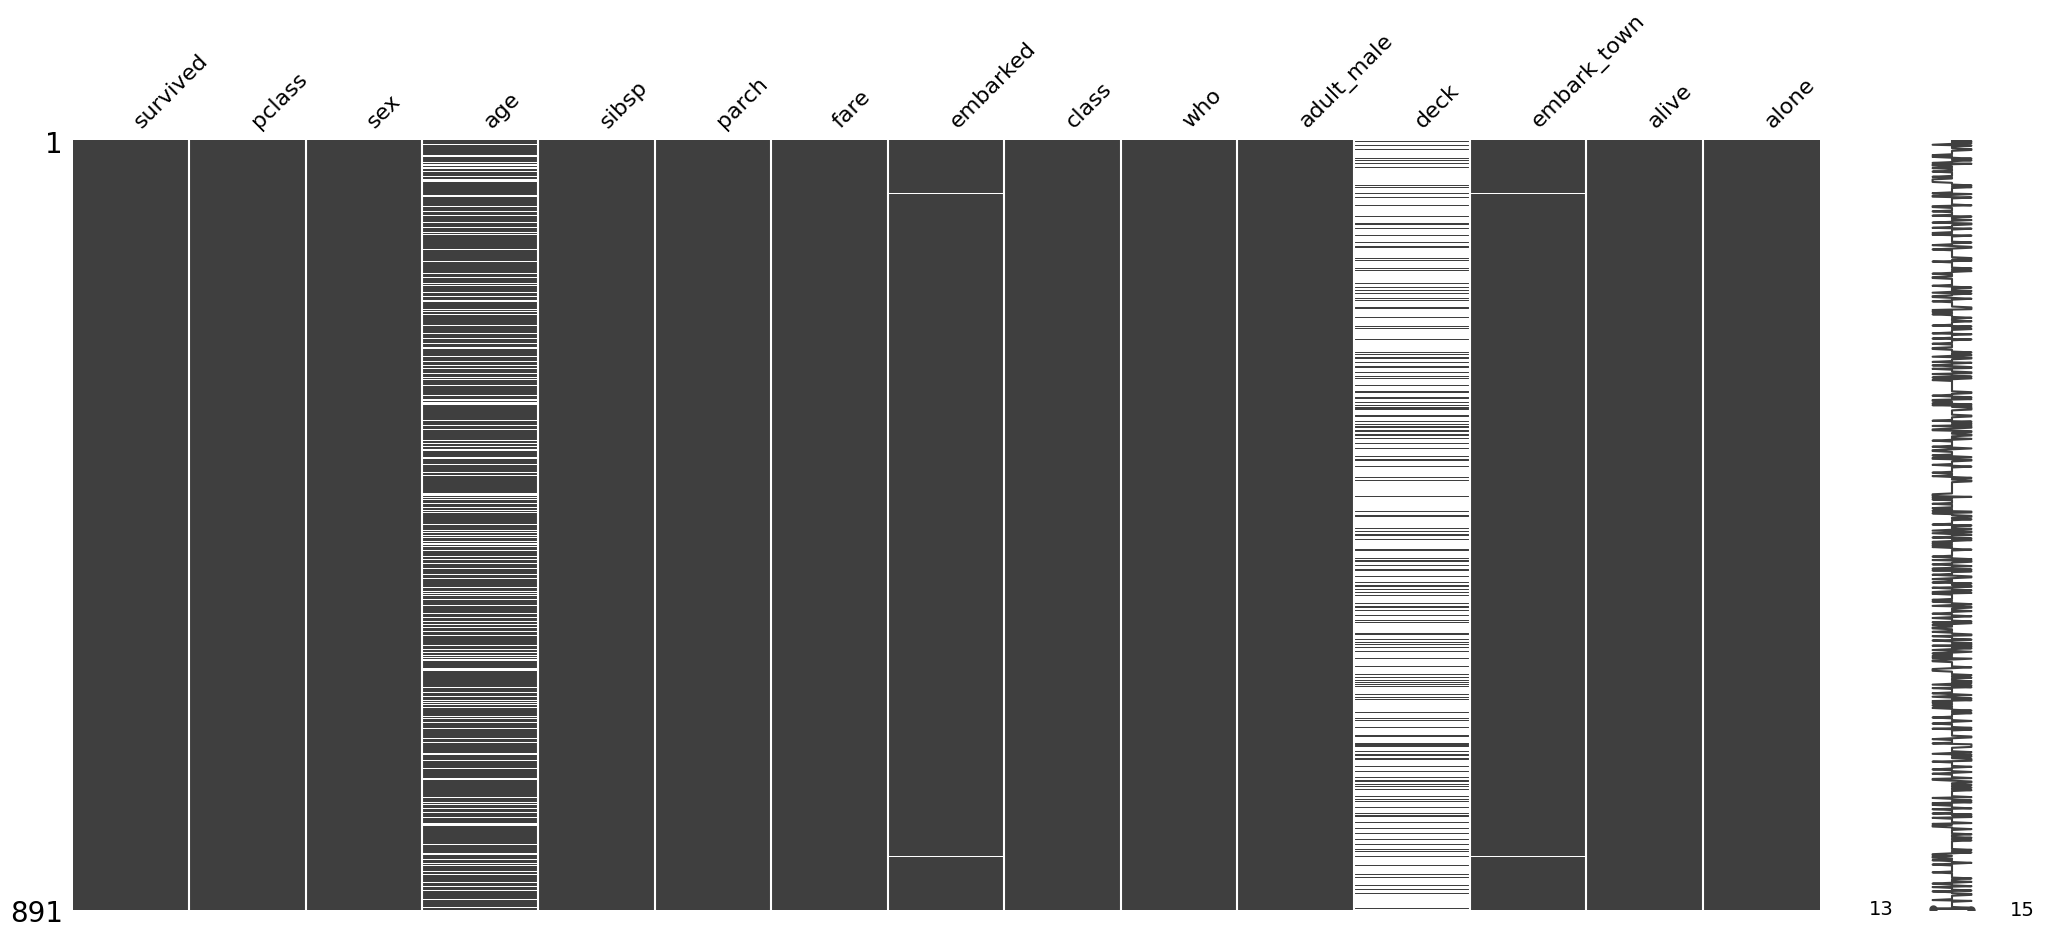

In [8]:
import missingno as msno

msno.matrix(df);

In [9]:
df[df['age'].isna()] # Visualização de linhas em que há valor faltante na coluna 'age'

survived  pclass     sex  age  sibsp  parch     fare embarked   class  \
5           0       3    male  NaN      0      0   8.4583        Q   Third   
17          1       2    male  NaN      0      0  13.0000        S  Second   
19          1       3  female  NaN      0      0   7.2250        C   Third   
26          0       3    male  NaN      0      0   7.2250        C   Third   
28          1       3  female  NaN      0      0   7.8792        Q   Third   
..        ...     ...     ...  ...    ...    ...      ...      ...     ...   
859         0       3    male  NaN      0      0   7.2292        C   Third   
863         0       3  female  NaN      8      2  69.5500        S   Third   
868         0       3    male  NaN      0      0   9.5000        S   Third   
878         0       3    male  NaN      0      0   7.8958        S   Third   
888         0       3  female  NaN      1      2  23.4500        S   Third   

       who  adult_male deck  embark_town alive  alone  
5      man        True  NaN   Queenstown    no   True  
17     man        True  NaN  Southampton   yes   True  
19   woman       False  NaN    Cherbourg   yes   True  
26     man        True  NaN    Cherbourg    no   True  
28   woman       False  NaN   Queenstown   yes   True  
..     ...         ...  ...          ...   ...    ...  
859    man        True  NaN    Cherbourg    no   True  
863  woman       False  NaN  Southampton    no  False  
868    man        True  NaN  Southampton    no   True  
878    man        True  NaN  Southampton    no   True  
888  woman       False  NaN  Southampton    no  False  

[177 rows x 15 columns]